<a href="https://colab.research.google.com/github/Kushagratandon12/Machine-Learning-Projects/blob/master/Tensorflow_Assignment2%20Coursera%20-%20Deeplearning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
print (tf.__version__)
mnist = tf.keras.datasets.mnist

2.2.0


In [ ]:
(training_data , training_labels),(test_data,test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(training_data[0])

28

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

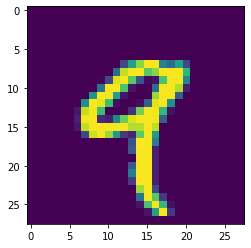

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_data[4])
print(training_data[4])

In [ ]:
#Normalizing the Data Set 
training_data = training_data/255
test_data=test_data/255
print(training_labels)

[5 0 4 ... 5 6 8]


In [ ]:
model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                    keras.layers.Dense(1024,activation=tf.nn.relu),
                                    keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True


#calling the class 
callbacks=myCallback()

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_data,training_labels,epochs=10,batch_size=10,callbacks=[callbacks])

Epoch 1/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0806 - accuracy: 0.9761
Epoch 2/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0551 - accuracy: 0.9829
Epoch 3/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0443 - accuracy: 0.9868
Epoch 4/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0385 - accuracy: 0.9885
Epoch 5/10
5997/6000 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9907
Reached 99% accuracy so cancelling training!
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0318 - accuracy: 0.9907


In [ ]:
model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9794


[0.07080685347318649, 0.9793999791145325]